In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from mislabelling import symmetric_noise, pair_noise
from InitialTesting import *
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from InitialAdjustedRandomForest import train

np.random.default_rng(40)

Generator(PCG64) at 0x14CED9B60

# Experiments on the initial robust training scheme
Trying to evaluate how well the training scheme works and where it is limited

In [2]:
data = load_wine()
print(data.data.shape)

RESOLUTION = 20
TRIALS = 35
N_ESTIMATORS = 20
TEST_SIZE = 0.25
SEED = 0

FIG_SIZE = (5,4)
FONT_SIZE = 10
plt.rcParams["figure.figsize"] = FIG_SIZE  # width, height in inches

accuracies_all = []
relabelling_f1_all = []
relabelling_acc_all = []

(178, 13)


In [3]:
accuracies, relabelling_f1, relabelling_acc, noise_level = run_relabelling_experiment(data,
                                                                           RandomForestClassifier,
                                                                           symmetric_noise,
                                                                           n_estimators=N_ESTIMATORS,
                                                                           trials=TRIALS,
                                                                           resolution=RESOLUTION,
                                                                           test_size=TEST_SIZE,
                                                                           relabelling=True,
                                                                           bootstrap=True,
                                                                           seed=SEED)

accuracies_all.append(accuracies[1])
accuracies_all.append(accuracies[0])
relabelling_f1_all.append(relabelling_f1[0])
relabelling_acc_all.append(relabelling_acc[0])

In [4]:
accuracies, relabelling_f1, relabelling_acc, noise_level = run_relabelling_experiment(data,
                                                                           RandomForestClassifier,
                                                                           symmetric_noise,
                                                                           n_estimators=N_ESTIMATORS,
                                                                           trials=TRIALS,
                                                                           resolution=RESOLUTION,
                                                                           test_size=TEST_SIZE,
                                                                           relabelling=False,
                                                                           bootstrap=True,
                                                                           seed=SEED,
                                                                           methods = ('standard'))

accuracies_all.append(accuracies[0])

In [5]:
accuracies, relabelling_f1, relabelling_acc, noise_level = run_relabelling_experiment(data,
                                                                           RandomForestClassifier,
                                                                           symmetric_noise,
                                                                           n_estimators=N_ESTIMATORS,
                                                                           trials=TRIALS,
                                                                           resolution=RESOLUTION,
                                                                           test_size=TEST_SIZE,
                                                                           relabelling=False,
                                                                           bootstrap=False,
                                                                           seed=SEED,
                                                                           methods = ('standard'))

accuracies_all.append(accuracies[0])

In [ ]:
accuracies, relabelling_f1, relabelling_acc, noise_level = run_relabelling_experiment(data,
                                                                           RandomForestClassifier,
                                                                           symmetric_noise,
                                                                           n_estimators=N_ESTIMATORS,
                                                                           trials=TRIALS,
                                                                           resolution=RESOLUTION,
                                                                           test_size=TEST_SIZE,
                                                                           relabelling=True,
                                                                           bootstrap=False,
                                                                           seed=SEED,
                                                                           methods = ('standard'))

accuracies_all.append(accuracies[0])
relabelling_f1_all.append(relabelling_f1[0])
relabelling_acc_all.append(relabelling_acc[0])

In [22]:
accuracies, relabelling_f1, relabelling_acc, noise_level = run_relabelling_experiment(data,
                                                                           RandomForestClassifier,
                                                                           symmetric_noise,
                                                                           n_estimators=N_ESTIMATORS,
                                                                           trials=TRIALS,
                                                                           resolution=RESOLUTION,
                                                                           test_size=TEST_SIZE,
                                                                           relabelling=False,
                                                                           bootstrap=True,
                                                                           seed=SEED,
                                                                           methods = ('standard'),
                                                                           hard = True)

accuracies_all.append(accuracies[0])
relabelling_f1_all.append(relabelling_f1[0])
relabelling_acc_all.append(relabelling_acc[0])

In [8]:
N_ESTIMATORS = 50

accuracies, relabelling_f1, relabelling_acc, noise_level = run_relabelling_experiment(data,
                                                                           RandomForestClassifier,
                                                                           symmetric_noise,
                                                                           n_estimators=N_ESTIMATORS,
                                                                           trials=TRIALS,
                                                                           resolution=RESOLUTION,
                                                                           test_size=TEST_SIZE,
                                                                           relabelling=True,
                                                                           bootstrap=True,
                                                                           relabel_bunch=5,
                                                                           methods = ('standard'))

accuracies_all.append(accuracies[0])
relabelling_f1_all.append(relabelling_f1[0])
relabelling_acc_all.append(relabelling_acc[0])

accuracies, relabelling_f1, relabelling_acc, noise_level = run_relabelling_experiment(data,
                                                                           RandomForestClassifier,
                                                                           symmetric_noise,
                                                                           n_estimators=N_ESTIMATORS,
                                                                           trials=TRIALS,
                                                                           resolution=RESOLUTION,
                                                                           test_size=TEST_SIZE,
                                                                           relabelling=True,
                                                                           bootstrap=True,
                                                                           methods = ('standard'))

accuracies_all.append(accuracies[0])
relabelling_f1_all.append(relabelling_f1[0])
relabelling_acc_all.append(relabelling_acc[0])

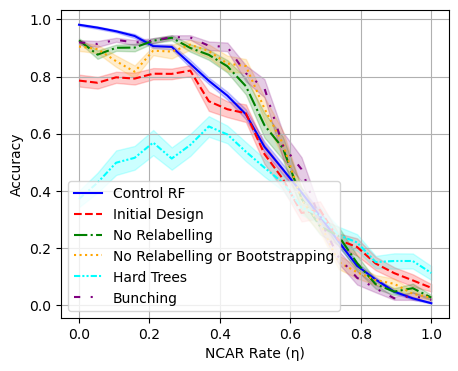

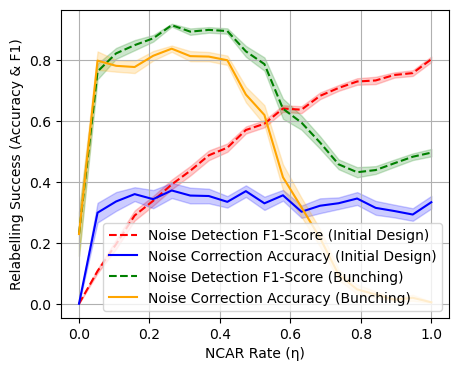

In [24]:
accuracies_mean, accuracies_se, relabelling_f1_success, relabelling_f1_se, relabelling_acc_success, relabelling_acc_se, x_axis = process_experiment_results(accuracies_all, relabelling_f1_all, relabelling_acc_all, RESOLUTION, TEST_SIZE, len(data.target))

# Accuracy lines
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="Control RF", color='blue', linestyle='-')
plot_with_error_band(x_axis, accuracies_mean[1], accuracies_se[1], label="Initial Design", color='red', linestyle='--')
plot_with_error_band(x_axis, accuracies_mean[2], accuracies_se[2], label="No Relabelling", color='green', linestyle='-.')
plot_with_error_band(x_axis, accuracies_mean[3], accuracies_se[3], label="No Relabelling or Bootstrapping", color='orange', linestyle=':')
plot_with_error_band(x_axis, accuracies_mean[-1], accuracies_se[-1], label="Hard Trees", color='cyan', linestyle=(0, (3, 1, 1, 1, 1, 1)))
plot_with_error_band(x_axis, accuracies_mean[6], accuracies_se[6], label="Bunching", color='purple', linestyle=(0, (3, 5, 1, 5, 1, 5)))

plt.xlabel(fontsize=FONT_SIZE, xlabel = "NCAR Rate (η)")
plt.ylabel("Accuracy", fontsize=FONT_SIZE,)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

plot_with_error_band(x_axis, relabelling_f1_success[3], relabelling_f1_se[3], label="Noise Detection F1-Score (Initial Design)", color='red', linestyle='--')
plot_with_error_band(x_axis, relabelling_acc_success[3], relabelling_acc_se[3], label="Noise Correction Accuracy (Initial Design)", color='blue')
plot_with_error_band(x_axis, relabelling_f1_success[2], relabelling_f1_se[2], label="Noise Detection F1-Score (Bunching)", color='green', linestyle='--')
plot_with_error_band(x_axis, relabelling_acc_success[2], relabelling_acc_se[2], label="Noise Correction Accuracy (Bunching)", color='orange')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "NCAR Rate (η)")
plt.ylabel("Relabelling Success (Accuracy & F1)", fontsize=FONT_SIZE,)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

In [42]:
print(f"Control accuracy (η=0): {accuracies_mean[0][0]:.3f}")
print(f"Initial Design accuracy (η=0): {accuracies_mean[1][0]:.3f}")
print(f"difference = {accuracies_mean[0][0]-accuracies_mean[1][0]:.3f}")

print(f"\nMax difference no relabelling: {max(accuracies_mean[2] - accuracies_mean[0]):.3f} at η={0.05 * np.argmax(accuracies_mean[2] - accuracies_mean[0])}")
print(f"clean data difference = {accuracies_mean[0][0]-accuracies_mean[2][0]:.3f}")

Control accuracy (η=0): 0.977
Initial Design accuracy (η=0): 0.734
difference = 0.243

Max difference no relabelling: 0.199 at η=0.45
clean data difference = 0.032


In [59]:
for i in range(5, 7):
    accuracies_all, relabelling_f1_all, relabelling_acc_all, noise_levels = run_relabelling_experiment(data,
                                                                            RandomForestClassifier,
                                                                            symmetric_noise,
                                                                            n_estimators=N_ESTIMATORS + 20,
                                                                            trials=TRIALS,
                                                                            methods = 'standard',
                                                                            resolution=RESOLUTION,
                                                                            test_size=TEST_SIZE,
                                                                            relabelling=True,
                                                                            bootstrap=False,
                                                                            relabel_bunch=i)

    # Calculate mean and standard deviation
    f1_mean = relabelling_f1_all.mean()
    f1_std = relabelling_f1_all.std()

    acc_mean = relabelling_acc_all.mean()
    acc_std = relabelling_acc_all.std()

    print(f"Relabel Bunch = {i}")
    print(f"F1 Mean: {f1_mean:.3f}, Std: {f1_std:.3f}")
    print(f"Accuracy Mean: {acc_mean:.3f}, Std: {acc_std:.3f}\n")

Relabel Bunch = 5
F1 Mean: 0.303, Std: 0.347
Accuracy Mean: 0.208, Std: 0.321

Relabel Bunch = 6
F1 Mean: 0.326, Std: 0.368
Accuracy Mean: 0.216, Std: 0.337



In [ ]:
for i in range(1, 11):
    accuracies_all, relabelling_f1_all, relabelling_acc_all, noise_levels = run_relabelling_experiment(data,
                                                                            RandomForestClassifier,
                                                                            symmetric_noise,
                                                                            n_estimators=N_ESTIMATORS,
                                                                            trials=TRIALS,
                                                                            methods = 'standard',
                                                                            resolution=RESOLUTION,
                                                                            test_size=TEST_SIZE,
                                                                            relabelling=True,
                                                                            bootstrap=False,
                                                                            relabel_bunch=i)

    # Calculate mean and standard deviation
    f1_mean = relabelling_f1_all.mean()
    f1_std = relabelling_f1_all.std()

    acc_mean = relabelling_acc_all.mean()
    acc_std = relabelling_acc_all.std()

    print(f"Relabel Bunch = {i}")
    print(f"F1 Mean: {f1_mean:.3f}, Std: {f1_std:.3f}")
    print(f"Accuracy Mean: {acc_mean:.3f}, Std: {acc_std:.3f}\n")

In [58]:
from scipy.stats import norm
n_samples = len(data.data)
initial_certainty = 0.95

dt = DecisionTreeClassifier(random_state=SEED)
np.random.seed(SEED)

for _ in range(100):
    clean_observed_certainty = [[], [], []]
    noisy_observed_certainty = [[], [], []]
    noisy_true_certainty = [[], [], []]

    indices = np.random.choice(n_samples, size=n_samples, replace=True)

    y_train = np.copy(data.target)
    y_mislabelled = symmetric_noise(y_train, 0.4)
    mislabel_mask = y_mislabelled != data.target
    n_classes = len(set(y_train))

    X_boot = data.data[indices]
    y_boot = y_mislabelled[indices]
    
    y_boot = np.array(y_boot)
    p = np.eye(n_classes)[y_boot] #OHE
    p[p == 0] = (1-initial_certainty)/(n_classes-1)
    p[p == 1] = initial_certainty
    weights = np.copy(p)

    X_boot = np.repeat(X_boot, n_classes, axis=0)
    y_boot = np.array(list(range(n_classes)) * len(weights))
    weights = weights.flatten()

    dt.fit(X_boot, y_boot, sample_weight=weights)

    for i in range(n_samples):
        if mislabel_mask[i]:
            noisy_observed_certainty[i in indices].append(dt.predict_proba([data.data[i]])[0][y_mislabelled[i]])
            noisy_true_certainty[i in indices].append(dt.predict_proba([data.data[i]])[0][data.target[i]])
        else:
            clean_observed_certainty[i in indices].append(dt.predict_proba([data.data[i]])[0][data.target[i]])    

for _ in range(100):
    y_train = np.array(data.target)
    p = np.eye(n_classes)[y_train] #OHE
    p[p == 0] = (1-initial_certainty)/(n_classes-1)
    p[p == 1] = initial_certainty
    weights = np.copy(p)

    X_train = np.repeat(data.data, n_classes, axis=0)
    y_train = np.array(list(range(n_classes)) * len(weights))
    weights = weights.flatten()

    dt.fit(X_train, y_train, sample_weight=weights)

    for i in range(n_samples):
        if mislabel_mask[i]:
            noisy_observed_certainty[2].append(dt.predict_proba([data.data[i]])[0][data.target[i]])
            noisy_true_certainty[2].append(dt.predict_proba([data.data[i]])[0][y_mislabelled[i]])
        else:
            clean_observed_certainty[2].append(dt.predict_proba([data.data[i]])[0][data.target[i]])

print("Included")
print(f"Noisy Observed Label Certainty: {np.mean(noisy_observed_certainty[1]):.3f}; std = {np.std(noisy_observed_certainty[1]):.3f}")
print(f"Noisy True Label Certainty: {np.mean(noisy_true_certainty[1]):.3f}; std = {np.std(noisy_true_certainty[1]):.3f}")
print(f"Clean Label Certainty: {np.mean(clean_observed_certainty[1]):.3f}; std = {np.std(clean_observed_certainty[1]):.3f}")

print("\nExcluded")
print(f"Noisy Observed Label Certainty: {np.mean(noisy_observed_certainty[0]):.3f}; std = {np.std(noisy_observed_certainty[0]):.3f}")
print(f"Noisy True Label Certainty: {np.mean(noisy_true_certainty[0]):.3f}; std = {np.std(noisy_true_certainty[0]):.3f}")
print(f"Clean Label Certainty: {np.mean(clean_observed_certainty[0]):.3f}; std = {np.std(clean_observed_certainty[0]):.3f}")

observed_certainty = noisy_observed_certainty[1] + clean_observed_certainty[1] + clean_observed_certainty[0] + noisy_observed_certainty[1]
# Compute the difference and pooled standard deviation
delta_mu = abs(np.mean(observed_certainty) - np.mean(clean_observed_certainty[0]))
pooled_sigma = np.sqrt(2 * (np.std(observed_certainty)**2 + np.std(clean_observed_certainty[0])**2))

# Calculate the Z-score and overlapping coefficient (OVL)
z = delta_mu / pooled_sigma
overlap = 2 * norm.cdf(-z)

print("\nOverall:")
print(f"Observed Label Certainty: {np.mean(observed_certainty):.3f}; std = {np.std(observed_certainty):.3f}")
print(f"Excluded Clean OOB Samples: {1-overlap:.3f}%")

print("\nNon-Bootstrapped")
print(f"Noisy Observed Label Certainty: {np.mean(noisy_observed_certainty[2]):.3f}; std = {np.std(noisy_observed_certainty[2]):.3f}")
print(f"Noisy True Label Certainty: {np.mean(noisy_true_certainty[2]):.3f}; std = {np.std(noisy_true_certainty[2]):.3f}")
print(f"Clean Label Certainty: {np.mean(clean_observed_certainty[2]):.3f}; std = {np.std(clean_observed_certainty[2]):.3f}")

Included
Noisy Observed Label Certainty: 0.950; std = 0.000
Noisy True Label Certainty: 0.025; std = 0.000
Clean Label Certainty: 0.950; std = 0.000

Excluded
Noisy Observed Label Certainty: 0.238; std = 0.390
Noisy True Label Certainty: 0.416; std = 0.457
Clean Label Certainty: 0.465; std = 0.462

Overall:
Observed Label Certainty: 0.849; std = 0.289
Excluded Clean OOB Samples: 0.381%

Non-Bootstrapped
Noisy Observed Label Certainty: 0.950; std = 0.000
Noisy True Label Certainty: 0.025; std = 0.000
Clean Label Certainty: 0.950; std = 0.000
